In [1]:
import opdata
import numpy as np
import cv2 as cv
import sys
import dataProc
sys.path.append('./preprocess/')
sys.path.append('./analy/')
import preprocess.visualize as visualize
import preprocess.ecg as Ecg
import preprocess.pseudoEcg as pseudoEcg
import analysis
import matplotlib.pyplot as plt
import resUnet3d
import analy.activation as activation

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Optical mapping

In [2]:
import importlib
importlib.reload(opdata)

<module 'opdata' from '/notebooks/nb/ecg2mem/opdata.py'>

In [3]:
path = '/mnt/Jalife/ExperimentData/20190717-1/op/C001H001S0002/'
op = opdata.OpVmem(path, (256, 256), (0, 0, 256, 256), end=2000)

In [4]:
! mkdir /mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190717-1

KeyboardInterrupt: 

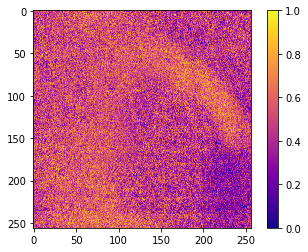

In [5]:
raw_vmem_video = visualize.makeMovie(op.vmem, 'plasma', 30)
raw_vmem_video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190717-1/1_raw.mp4')

In [54]:
op.spatialFilter(3)
# op.temporalFilter(5)
op.highPassFilter(2, 3)

In [ ]:
filtered_vmem_video = visualize.makeMovie(op.vmem, 'plasma', 30)
filtered_vmem_video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190717-1/1_filtered.mp4')

In [ ]:
pxnormed_vmem = dataProc.channelNormalize(op.vmem)
video = visualize.makeMovie(pxnormed_vmem, 'plasma', 30)
video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190717-1/1_pxnormed.mp4')

# Vmem

In [41]:
path = '/mnt/Jalife/ExperimentData/20190717-1/op/C001H001S0002/'
op = opdata.OpVmem(path, (256, 256), (0, 0, 256, 256), end=2000)

# ECG

In [5]:
importlib.reload(Ecg)

<module 'preprocess.ecg' from '/notebooks/nb/ecg2mem/preprocess/ecg.py'>

## raw

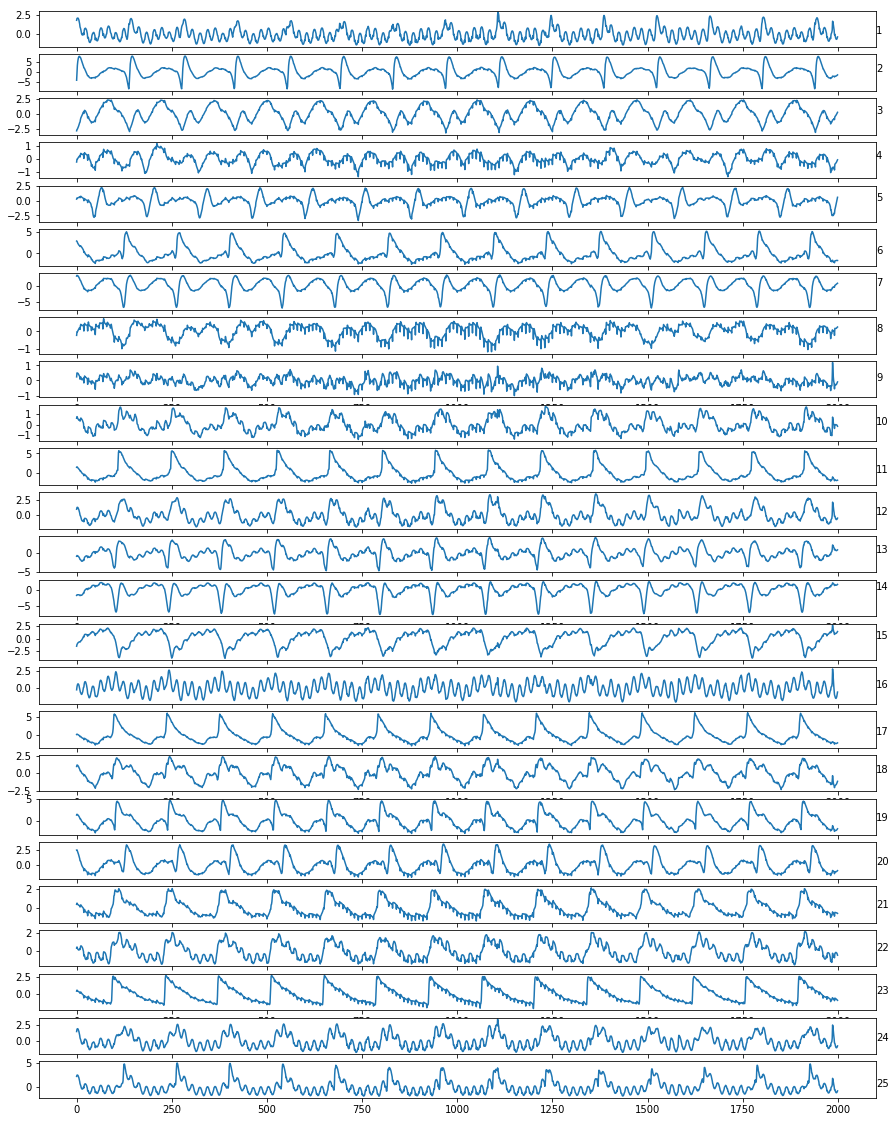

In [6]:
ecg_raw = Ecg.load('/mnt/Jalife/ExperimentData/20190717-1/ecg/C001H001S0002/20190717180850416.csv', 0, 2000,1,26)
fig_ecg_raw = visualize.plot(ecg_raw)
fig_ecg_raw

## filter

In [7]:
ecg = Ecg.filterEcg(ecg_raw, 1000, 150, 3, 2, 3, (50, 100), (3, 3))

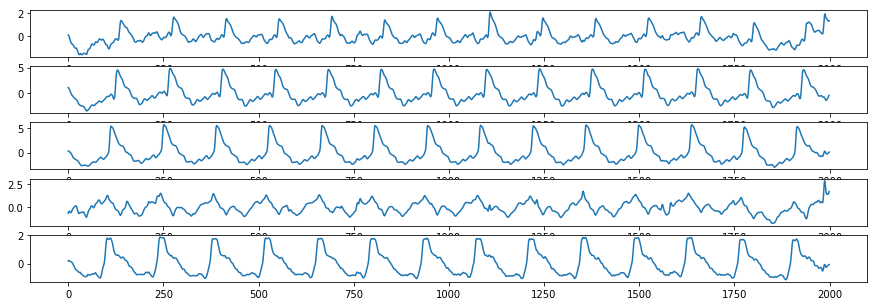

In [8]:
#1~21横比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,5*k])

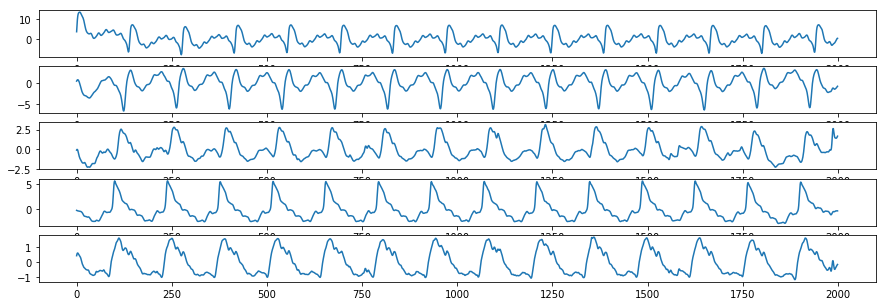

In [9]:
#2~22 横比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,5*k+1])

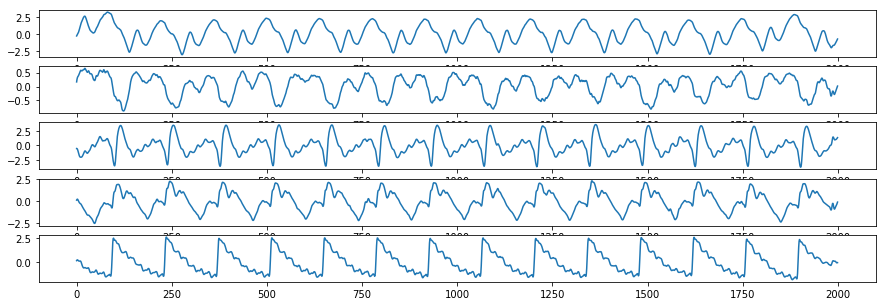

In [10]:
#3~23 横比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,5*k+2])

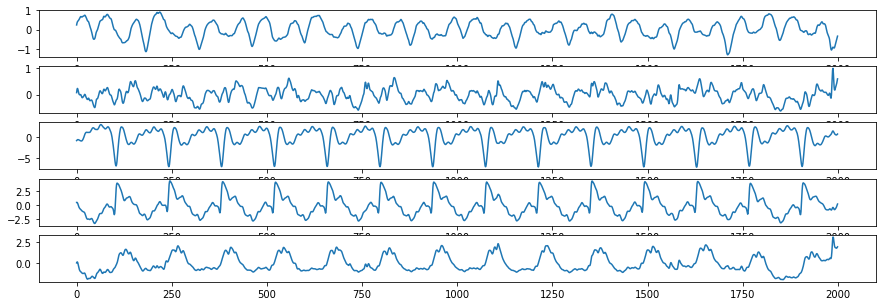

In [11]:
#4~24 横比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,5*k+3])

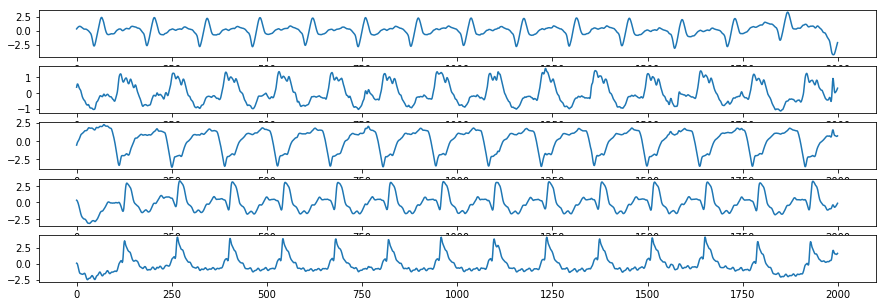

In [12]:
#5~25横比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,5*k+4])

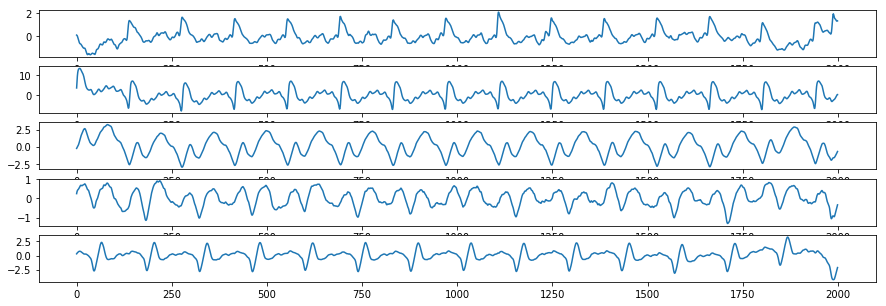

In [13]:
#1~5 縦比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,k])

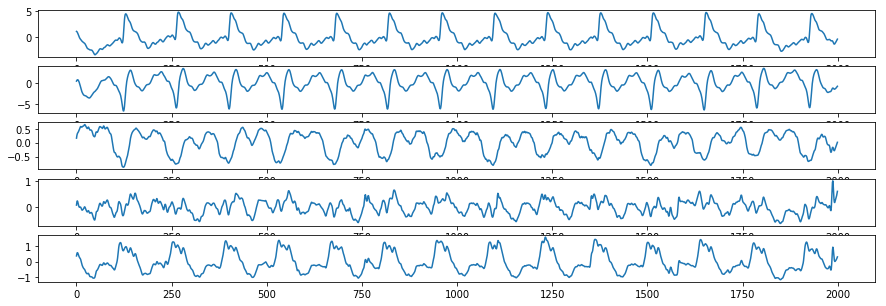

In [14]:
#6~10 縦比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,k+5])

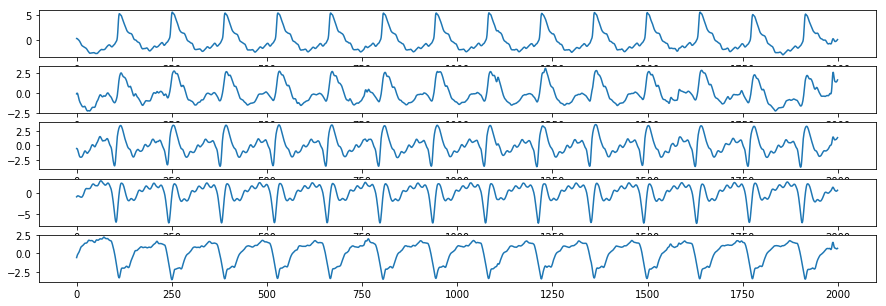

In [15]:
#11~15 縦比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,k+10])

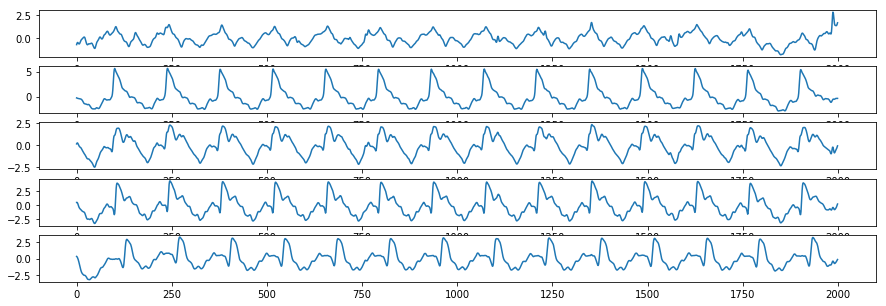

In [16]:
#16~20 縦比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,k+15])

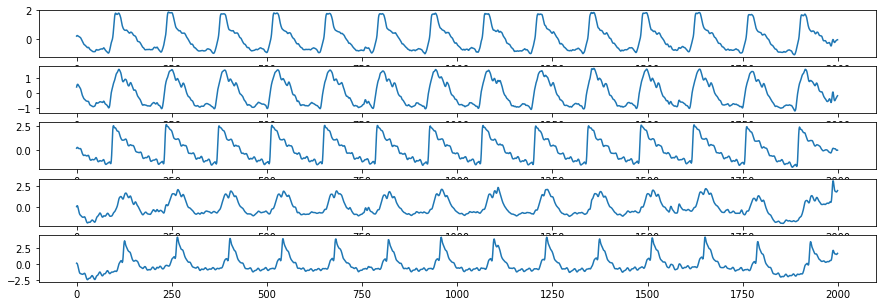

In [17]:
#21~25 縦比較
fig = plt.figure(figsize=(15,5))
for k in range(0,5):
    plt.subplot(5,1,k+1)
    plt.plot(ecg[:,k+20])

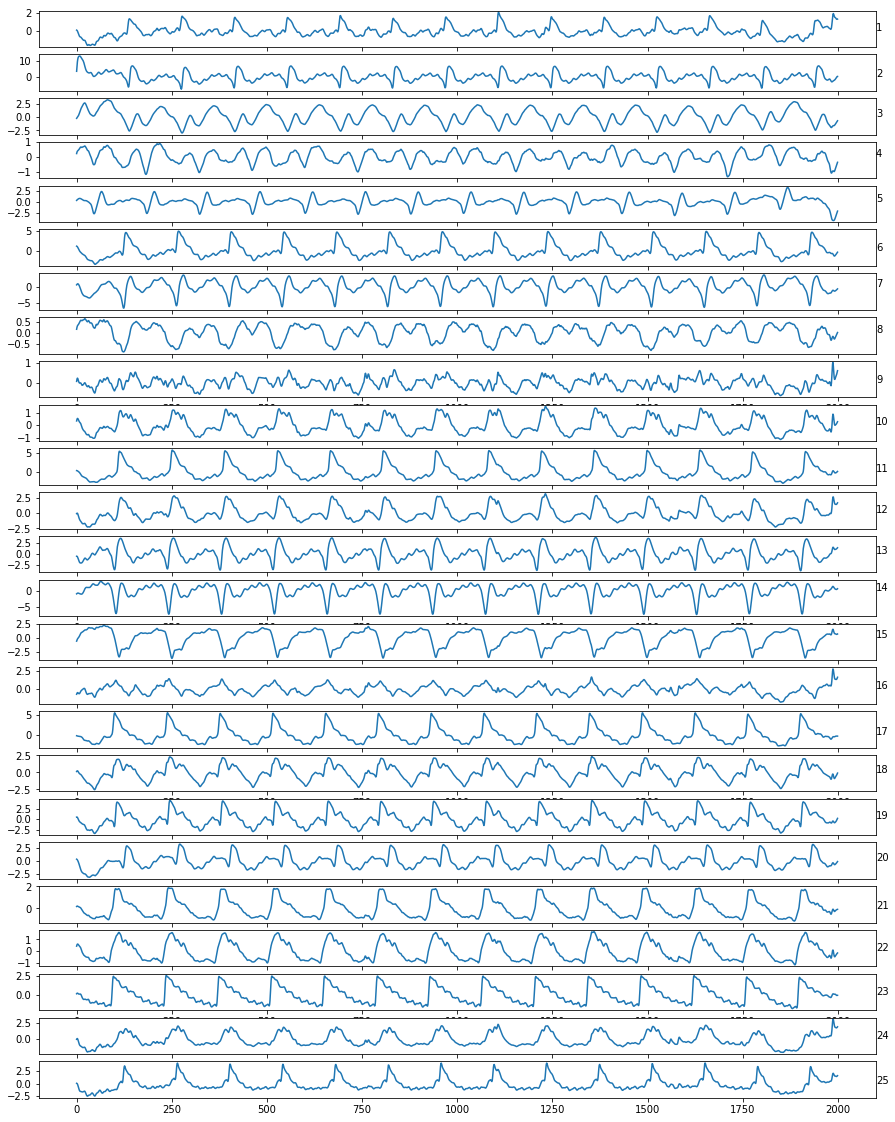

In [18]:
fig_ecg = visualize.plot(ecg)
fig_ecg

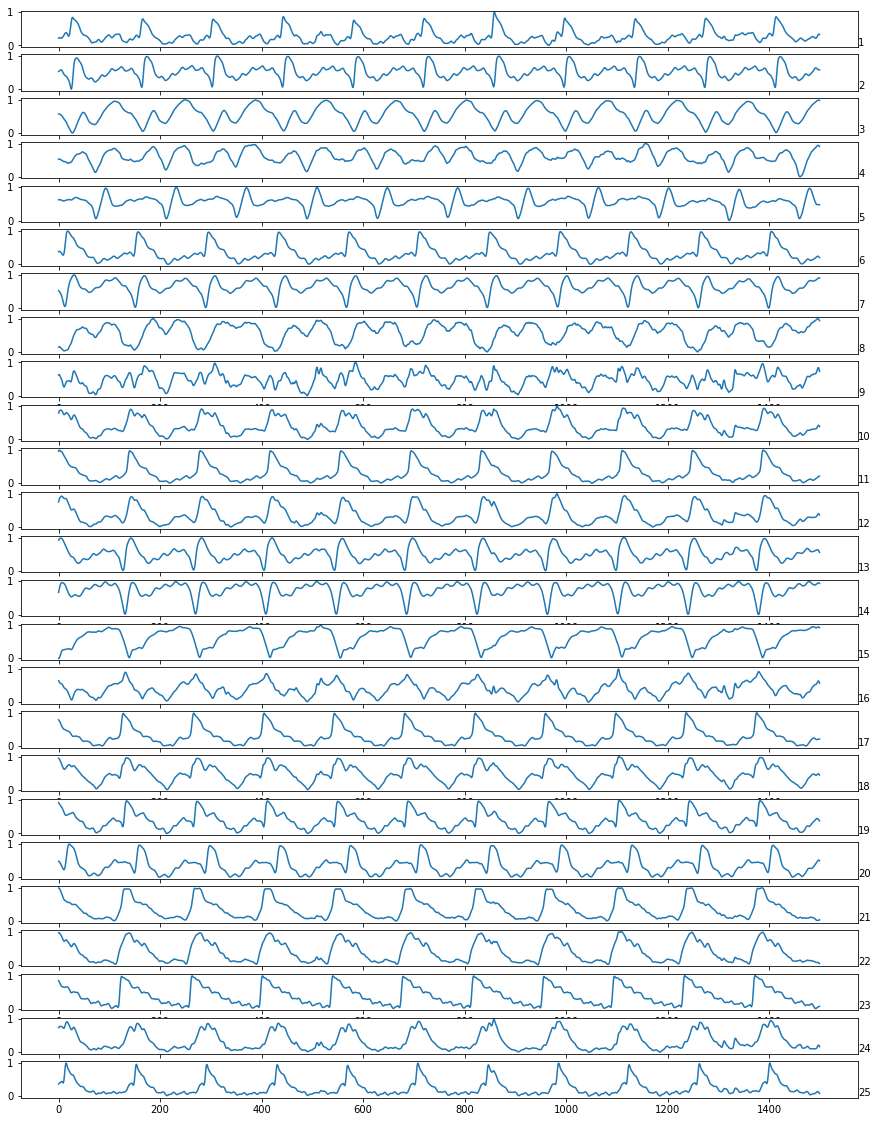

In [19]:
ecg_valid = ecg[250:1750, :]
ecg_valid = dataProc.channelNormalize(ecg_valid)
fig_ecg_valid = visualize.plot(ecg_valid)
fig_ecg_valid

# prediction

In [20]:
elec_256 = np.array([[57,191],[92,192],[124,192],[158,194],[193,195],[60,157],[93,158],[124,159],[163,159],[191,164],
[60,124],[92,124],[126,125],[160,126],[193,130],
[60,91],[94,92],[128,91],[161,93],[203,93],
[62,58],[96,60],[128,59],[162,59],[194,62]], np.float32)

In [21]:
! mkdir /mnt/Omer/Project/07.DeepElectrodeMapping/electrodes/20190717-1

mkdir: cannot create directory '/mnt/Omer/Project/07.DeepElectrodeMapping/electrodes/20190717-1': File exists


In [22]:
np.save('/mnt/Omer/Project/07.DeepElectrodeMapping/electrodes/20190717-1/12_256', elec_256)

In [23]:
elec_93 = np.zeros_like(elec_256)



In [24]:
elec_93[:, 0] = (elec_256[:, 0] - 42)*93/(214-42)
elec_93[:, 1] = (elec_256[:, 1] - 40)*93/(210-40)

In [25]:
np.save('/mnt/Omer/Project/07.DeepElectrodeMapping/electrodes/20190717-1/12_93', elec_93)

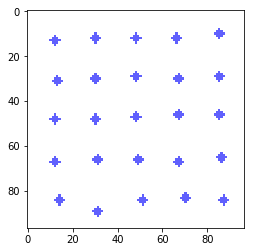

In [26]:
elec_img = analysis.drawElectrodes(elec_93, mapSize=(93, 93))
plt.imshow(elec_img)

In [27]:
ecg_maps_93 = pseudoEcg.interpolate(ecg_valid, elec_93, (93, 93))
ecg_maps_32 = dataProc.resizeSequence(ecg_maps_93, (32, 32), cv.INTER_LINEAR)
ecg_maps_32.shape

(1500, 32, 32, 1)

In [28]:
ecg_blocks = dataProc.sequenceToBlocks(ecg_maps_32, 320, 16)
ecg_blocks.shape

(5, 320, 32, 32, 1)

In [29]:
netg = resUnet3d.getModel(320, 32, 32, 1, 4, 32, 16, 'sigmoid')
netg.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 320, 32, 32,  0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 320, 32, 32,  896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 320, 32, 32,  64          conv3d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 320, 32, 32,  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv3d_2 (

In [59]:
model_dir = '/mnt/Omer/Project/07.DeepElectrodeMapping/model/20190710_1/netg.h5'
netg.load_weights(model_dir)

In [31]:
pred_blocks = netg.predict(ecg_blocks)
pred_blocks.shape

(5, 320, 32, 32, 1)

In [32]:
pred = dataProc.blocksToSequence(pred_blocks, 16)
pred.shape

(1440, 32, 32, 1)

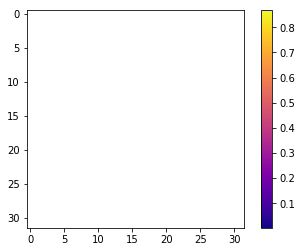

In [33]:
video = visualize.makeMovie(pred, 'plasma', 30)
video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190717-1/12_2_pred.mp4')

In [37]:
np.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/prediction/exp/20190717_1_2/vm',pred)

In [39]:
print(pred)

[[[[0.6994286 ]
   [0.62605524]
   [0.563998  ]
   ...
   [0.07130803]
   [0.09223901]
   [0.11674578]]

  [[0.6636524 ]
   [0.62057716]
   [0.5632634 ]
   ...
   [0.04412253]
   [0.0632061 ]
   [0.08952013]]

  [[0.6555892 ]
   [0.61834675]
   [0.563831  ]
   ...
   [0.03655897]
   [0.05036516]
   [0.07439341]]

  ...

  [[0.1108316 ]
   [0.4828187 ]
   [0.711603  ]
   ...
   [0.64283454]
   [0.64384574]
   [0.6384034 ]]

  [[0.06329163]
   [0.07851128]
   [0.24468271]
   ...
   [0.6409269 ]
   [0.6383721 ]
   [0.63670516]]

  [[0.05999792]
   [0.03959028]
   [0.04616501]
   ...
   [0.6408366 ]
   [0.6357144 ]
   [0.6307724 ]]]


 [[[0.6942296 ]
   [0.6173901 ]
   [0.54845405]
   ...
   [0.06836849]
   [0.08893233]
   [0.11490548]]

  [[0.65648246]
   [0.61407095]
   [0.55362296]
   ...
   [0.04125023]
   [0.06146789]
   [0.08606023]]

  [[0.6491395 ]
   [0.6127388 ]
   [0.5559705 ]
   ...
   [0.03596248]
   [0.04890436]
   [0.06763482]]

  ...

  [[0.22040127]
   [0.66964734]
   [0.6

# activation time

In [43]:
ecg_actv = Ecg.filterEcg(ecg_raw, 1000, 30, 3, 2, 3, (50, 100), (3, 3))[250+16: 250+16+1440]
ecg_actv = dataProc.channelNormalize(ecg_actv)

In [45]:
vmem_actv = activation.VmemFromActivation(ecg_actv, elec_93, (93, 93), vmem_min=0, vmem_max=1, prominence=0.4)

/notebooks/nb/ecg2mem/analy/activation.py:55: RuntimeWarning: invalid value encountered in less
  self.mask = np.where(np.abs(self.vmem-self.vmem)<np.finfo(self.vmem.dtype).eps, False, True)


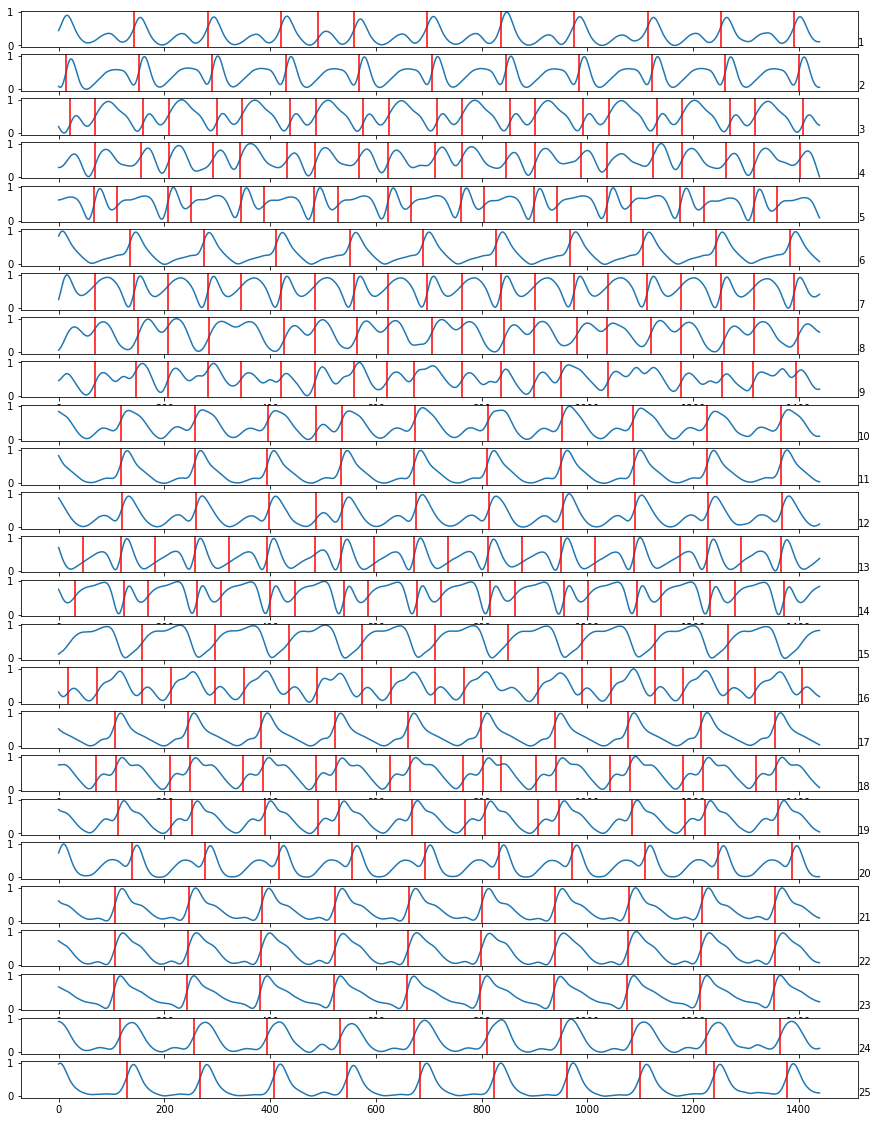

In [20]:
fig_actv = visualize.plot(ecg_actv)
for k in range(len(fig_actv.axes)):
    for activation_time in vmem_actv.activation_time[k]:
        fig_actv.axes[k].axvline(activation_time, color='r')
fig_actv

## activation timeとVmemの比較

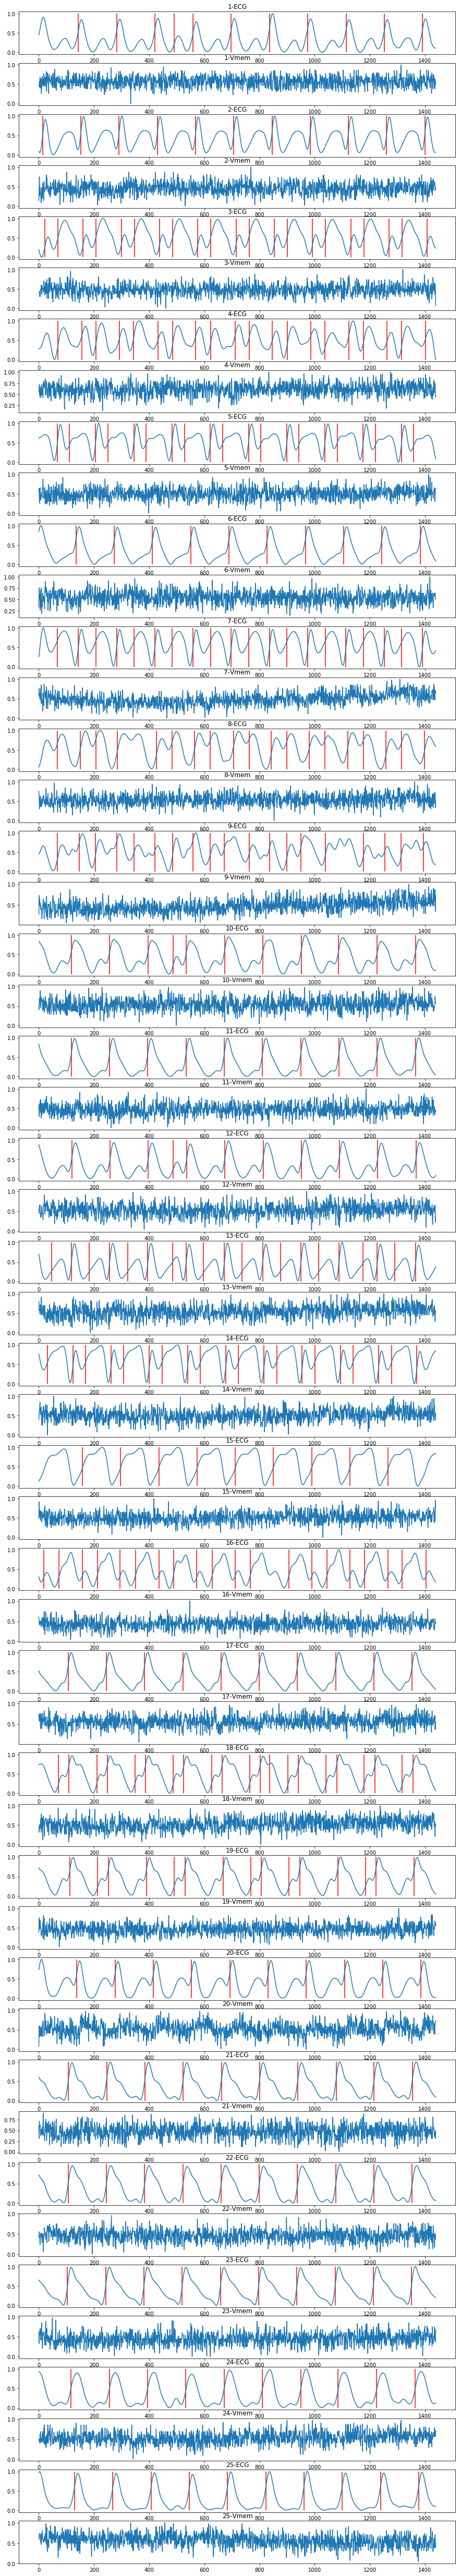

In [46]:
 plt.figure(figsize=(15,90))
fig_actv = visualize.plot(ecg_actv)

for  k in range(0,25):
    plt.subplot(50, 1, 2*k+1)
    plt.plot(ecg_actv[:, k])
    plt.vlines(vmem_actv.activation_time[k],0,1,color='r')
    plt.title('%d-ECG' % (k+1))

    plt.subplot(50, 1, 2*k+2)
    plt.plot(op.vmem[250+16: 250+16+1440, int(elec_256[k,0]), int(elec_256[k,1]), 0])
    plt.title('%d-Vmem' % (k+1))
    
    

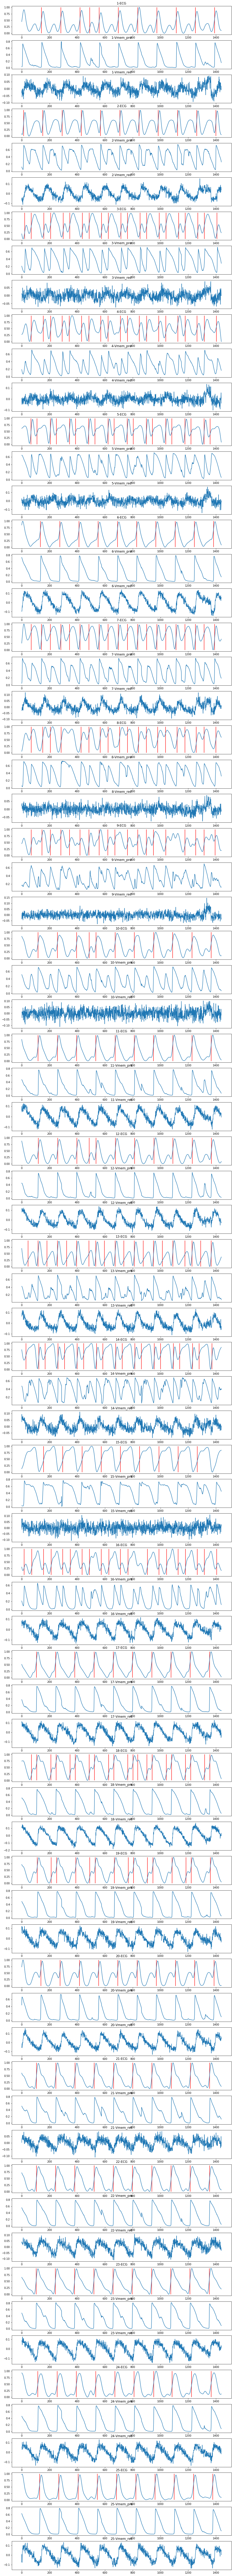

In [58]:
 plt.figure(figsize=(15,180))
fig_actv = visualize.plot(ecg_actv)

for  k in range(0,25):
    plt.subplot(75, 1, 3*k+1)
    plt.plot(ecg_actv[:, k])
    plt.vlines(vmem_actv.activation_time[k],0,1,color='r')
    plt.title('%d-ECG' % (k+1))

    plt.subplot(75, 1, 3*k+2)
    plt.plot(pred[0:1440, int(elec_93[k,0]*32/93), int(elec_93[k,1]*32/93), 0])
    plt.title('%d-Vmem_pre' % (k+1))
    
    plt.subplot(75, 1, 3*k+3)
    plt.plot(op.vmem[250+16: 250+16+1440, int(elec_256[k,0]), int(elec_256[k,1]), 0])
    plt.title('%d-Vmem_rec' % (k+1))
    
  
    